# TAREA

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [19]:
def integraluno(x):
    return np.exp(x)*np.log(x)

def integraldos(x):
    return np.sin(x)*np.log(x)


def montecarlo(f, a, b, N):
    u=np.random.uniform(a, b, N)
    y=f(u)
    return np.mean(y)*(b-a)

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

N=[10,100,1000,10000,10000]
tabla=pd.DataFrame(columns=["Aproximación"], index=N)
tabla.loc[10, "Aproximación"]= montecarlo(integraluno, 1, 3, 10)
tabla.loc[100, "Aproximación"]= montecarlo(integraluno, 1, 3, 100)
tabla.loc[1000, "Aproximación"]= montecarlo(integraluno, 1, 3, 1000)
tabla.loc[10000, "Aproximación"]= montecarlo(integraluno, 1, 3, 10000)
tabla.loc[100000, "Aproximación"]= montecarlo(integraluno, 1, 3, 100000)
tabla

,Aproximación
10,11.079014
100,13.016604
1000,14.327671
10000,14.000885
10000,14.000885
100000,14.044827


In [25]:

N=[10,100,1000,10000,10000]
tabla=pd.DataFrame(columns=["Aproximación"], index=N)
tabla.loc[10, "Aproximación"]= montecarlo(integraldos, 1, 3, 10)
tabla.loc[100, "Aproximación"]= montecarlo(integraldos, 1, 3, 100)
tabla.loc[1000, "Aproximación"]= montecarlo(integraldos, 1, 3, 1000)
tabla.loc[10000, "Aproximación"]= montecarlo(integraldos, 1, 3, 10000)
tabla.loc[100000, "Aproximación"]= montecarlo(integraldos, 1, 3, 100000)
tabla

,Aproximación
10,0.925174
100,0.827272
1000,0.884426
10000,0.871235
10000,0.871235
100000,0.870217


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

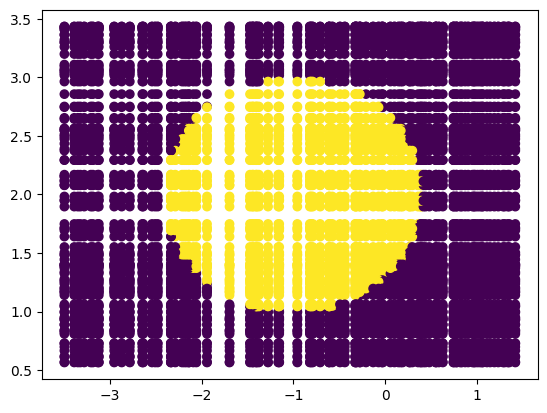

In [13]:
def bernoulli(x, y):
    return x**2+2*y**2 <= -2*x+8*y-7
N = 100
ax = -3.5
bx = 1.5
ay = 0.5
by = 3.5

X = np.random.uniform(ax, bx, N)
Y = np.random.uniform(ay, by, N)

X, Y = np.meshgrid(X, Y)
plt.scatter(X, Y, c=bernoulli(X,Y))

In [15]:
import pandas as pd
import numpy as np

def montecarlo2(region,ax, bx, ay, by, N):
    X = np.random.uniform(ax, bx, N)
    Y = np.random.uniform(ay, by, N)
    return np.mean(bernoulli(X, Y)) * ((by - ay)*(bx - ax))

def bernoulli(x, y):
    return x**2+2*y**2 <= -2*x+8*y-7
i = 1
N = 10
lista = []
while i <= 5:
    ax = -3.5
    bx = 1.5
    ay = 0.5
    by = 3.5
    lista.append(montecarlo2(bernoulli, ax, bx, ay, by, N))
    i = i + 1
    N = N*10

lista
df = pd.DataFrame(columns=["Términos", "Aprox"])
df["Términos"] = [10, 100, 1000, 10000, 100000]
df["Aprox"] = lista
df


,Términos,Aprox
0,10,6.00000
1,100,5.25000
2,1000,4.14000
3,10000,4.49850
4,100000,4.44795


3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.

**Simulación de transporte electrónico en nanoestructuras:** En nanotecnología, el diseño y la comprensión de dispositivos electrónicos a escala nanométrica son fundamentales. La integración de Monte Carlo permite simular el movimiento de electrones en nanoestructuras, como nanotubos de carbono o nanoalambres, teniendo en cuenta los efectos de dispersión, interacción con defectos de la red cristalina y otras imperfecciones. Estas simulaciones son esenciales para optimizar el rendimiento de dispositivos como transistores nanométricos o diodos emisores de luz (LED) a escala nanométrica.

**Caracterización de materiales nanoestructurados:** En el desarrollo de materiales nanoestructurados, es crucial comprender sus propiedades térmicas, mecánicas y ópticas. La integración de Monte Carlo permite simular la difusión de calor, la resistencia mecánica y la dispersión de la luz en materiales nanoestructurados. Por ejemplo, en el diseño de nanocompuestos poliméricos reforzados con nanotubos de carbono, la simulación Monte Carlo puede ayudar a predecir cómo se distribuyen los nanotubos dentro de la matriz polimérica y cómo esto afecta las propiedades mecánicas del material.

**Diseño de sistemas de entrega de medicamentos a escala nanométrica:** En la nanomedicina, se están desarrollando sistemas de entrega de medicamentos a escala nanométrica para mejorar la eficacia y reducir los efectos secundarios de los tratamientos médicos. La integración de Monte Carlo es útil para simular cómo estas nanopartículas cargadas de medicamentos interactúan con las células objetivo en el cuerpo humano. Esto incluye la simulación de la difusión de las nanopartículas en el torrente sanguíneo, su captura por células específicas y la liberación controlada de los medicamentos en el sitio de acción. Estas simulaciones ayudan en el diseño de sistemas de entrega de medicamentos más eficientes y selectivos.

**Referencias**  
Fernando, F. S., & De Física de la Materia Condensada, U. D. (1992, 11 diciembre). Transporte electrónico en nanoestructuras y microscopio de efecto túnel. Universidad Autónoma de Madrid. https://repositorio.uam.es/handle/10486/671873?show=full  

CARACTERIZACIÓN DE MATERIALES NANOESTRUCTURADOS DE SÍLICE MEDIANTE SIMULACIÓN MONTE CARLO. (s. f.). https://infap-unsl.conicet.gov.ar/caracterizacion-de-materiales-nanoestructurados-de-silice-mediante-simulacion-monte-carlo/  


